# Training and evaluation of model

In this notebook, we will train and evaluate the implemented model.

In [1]:
import gym
import time
import torch
import torch.optim as optim
import numpy as np
from tqdm.notebook import tqdm

from dqn_implementation.training_evaluation import Predictor
from dqn_implementation.model import DQN

In [2]:
env = gym.make('Breakout-v0')

# These parameters should be set once per DQN model - that enables multiple succesive trainings without loss of memory
hyperparameters = {
    "replay_memory_size": 10_000 + 1,
    "stacked_frames": 4,
    "env": env,
    "action_count": env.action_space.n,
    "replay_start_size": 500 + 1,
    "action_repeat": 4,
    "update_frequency": 4,
    "noop_max": 30,
    "scaling_factor": 0.99,
    "network_update_frequency": 100,
    "end_eps_frame": 10_000,
    "eps_beg": 1.0,
    "eps_end": 0.1,
    "models_directory": "../models/",
    "device": torch.device('cuda')
}

### Training v3

In [2]:
env = gym.make('Breakout-v0')

hyperparameters = {
    "replay_memory_size": 20_000 + 1,
    "stacked_frames": 4,
    "env": env,
    "action_count": env.action_space.n,
    "replay_start_size": 1000 + 1,
    "action_repeat": 4,
    "update_frequency": 4,
    "noop_max": 30,
    "scaling_factor": 0.99,
    "network_update_frequency": 5_000,
    "models_directory": "../models/",
    "device": torch.device('cuda')
}

In [3]:
dqn_predictor = Predictor(**hyperparameters)

In [4]:
def train(predictor, end_eps_frame, eps_beg, eps_end, epochs, stages, training_number):

    training_params = {
        "epochs": epochs,
        "optimizer": optim.RMSprop(dqn_predictor.dqn_new.parameters(), lr=0.01, momentum=0.95, eps=0.01, alpha=0.95),
        "batch_size": 32,
        "end_eps_frame": end_eps_frame,
        "eps_beg": eps_beg,
        "eps_end": eps_end
    }

    print(f"Beginning training number {training_number}...")

    t0 = time.time()

    for stage in tqdm(range(stages)):
        dqn_predictor.train(**training_params, cp_name = f"test_tr_{training_number}_stage_{stage+1}", 
                            stages = stages, stage = stage)

    t1 = time.time()
    diff = (t1 - t0) / 3600
    print(f"Training finished after {diff} hours")

    dqn_predictor.plot_losses(title = "Losses")
    dqn_predictor.plot_rewards(title = "Rewards")

Beginning training number 1...



Training finished after 4.4719554790523315 hours


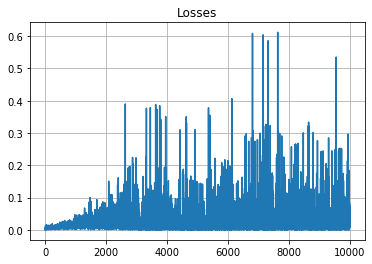

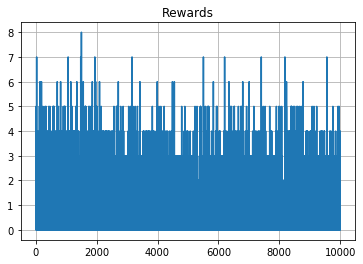

In [11]:
# 10_000 epochs
train( 
    predictor = dqn_predictor,
    end_eps_frame = 1_000_000,
    eps_beg = 1.0,
    eps_end = 0.1,
    epochs = 1_000,
    stages = 10,
    training_number = 1
)

In [16]:
dqn_predictor.total_frames / 1_000_000

3.927275

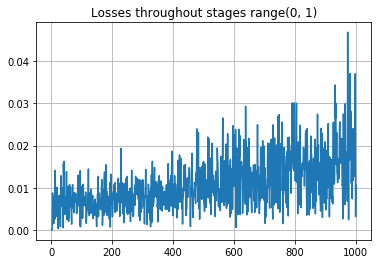

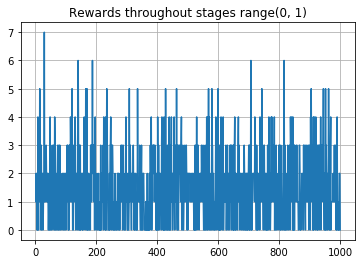

In [17]:
dqn_predictor.plot_losses(stages = range(0, 1), title = f"Losses throughout stages range(0, 1)")
dqn_predictor.plot_rewards(stages = range(0, 1), title = f"Rewards throughout stages range(0, 1)")

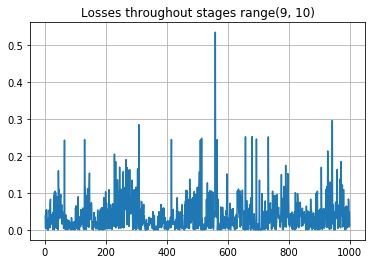

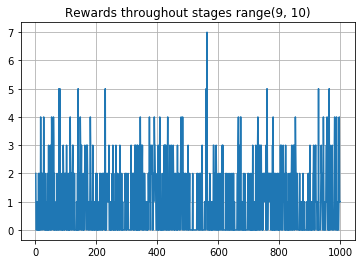

In [18]:
dqn_predictor.plot_losses(stages = range(9, 10), title = f"Losses throughout stages range(9, 10)")
dqn_predictor.plot_rewards(stages = range(9, 10), title = f"Rewards throughout stages range(9, 10)")

In [5]:
dqn_predictor.set_model_from_file("../models/test_tr_1_stage_10.pt")

Beginning training number 2...



Training finished after 9.812595979836251 hours


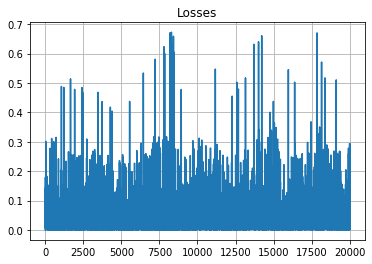

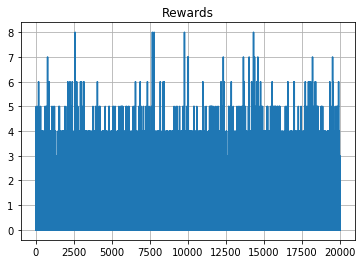

In [6]:
# 20_000 epochs
train(
    predictor = dqn_predictor,
    end_eps_frame = 1,
    eps_beg = 0.1,
    eps_end = 0.1,
    epochs = 2_000,
    stages = 10,
    training_number = 2
)

In [9]:
dqn_predictor.total_frames / 1_000_000

8.645799

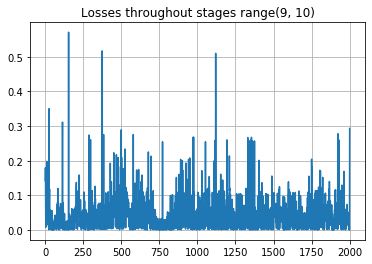

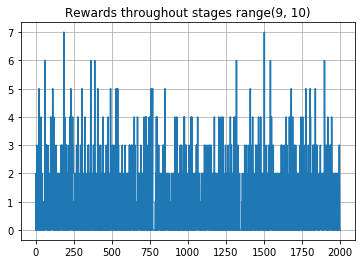

In [10]:
dqn_predictor.plot_losses(stages = range(9, 10), title = f"Losses throughout stages range(9, 10)")
dqn_predictor.plot_rewards(stages = range(9, 10), title = f"Rewards throughout stages range(9, 10)")

In [6]:
dqn_predictor.set_model_from_file("../models/test_tr_2_stage_10.pt")

Beginning training number 3...



Training finished after 5.363140168852277 hours


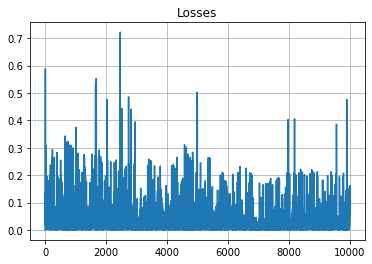

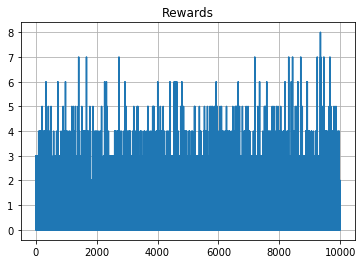

In [7]:
# 10_000 epochs
train(
    predictor = dqn_predictor,
    end_eps_frame = 1,
    eps_beg = 0.1,
    eps_end = 0.1,
    epochs = 1_000,
    stages = 10,
    training_number = 3
)

In [8]:
dqn_predictor.total_frames / 1_000_000

4.506897

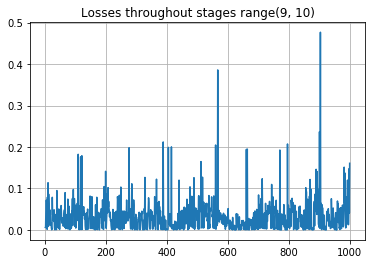

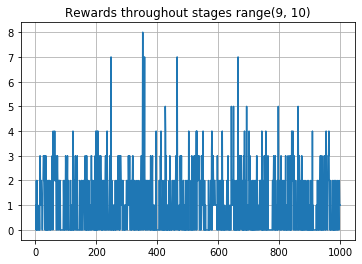

In [9]:
dqn_predictor.plot_losses(stages = range(9, 10), title = f"Losses throughout stages range(9, 10)")
dqn_predictor.plot_rewards(stages = range(9, 10), title = f"Rewards throughout stages range(9, 10)")

In [10]:
dqn_predictor.visualize(5, epsilon = 0.05, render = True, time_limit = 15)

[0.0, 0.0, 2.0, 2.0, 0.0]

### Training v4

In [2]:
env = gym.make('Breakout-v0')

hyperparameters = {
    "replay_memory_size": 20_000 + 1,
    "stacked_frames": 4,
    "env": env,
    "action_count": env.action_space.n,
    "replay_start_size": 1000 + 1,
    "action_repeat": 4,
    "update_frequency": 4,
    "noop_max": 30,
    "scaling_factor": 0.99,
    "network_update_frequency": 5_000,
    "models_directory": "../models/",
    "device": torch.device('cuda')
}

In [3]:
dqn_predictor = Predictor(**hyperparameters)

In [4]:
def train(predictor, end_eps_frame, eps_beg, eps_end, epochs, stages, training_number):

    training_params = {
        "epochs": epochs,
        "optimizer": optim.RMSprop(dqn_predictor.dqn_new.parameters(), lr=0.01, momentum=0.95, eps=0.01, alpha=0.95),
        "batch_size": 32,
        "end_eps_frame": end_eps_frame,
        "eps_beg": eps_beg,
        "eps_end": eps_end
    }

    print(f"Beginning training number {training_number}...")

    t0 = time.time()

    for stage in tqdm(range(stages)):
        dqn_predictor.train(**training_params, cp_name = f"cp_training_{training_number}_stage_{stage+1}", 
                            stages = stages, stage = stage)

    t1 = time.time()
    diff = (t1 - t0) / 3600
    print(f"Training finished after {diff} hours")

    dqn_predictor.plot_losses(title = "Losses")
    dqn_predictor.plot_rewards(title = "Rewards")

Beginning training number 1...



Training finished after 4.4719554790523315 hours


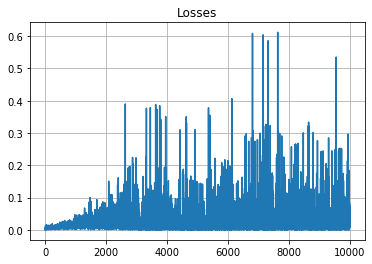

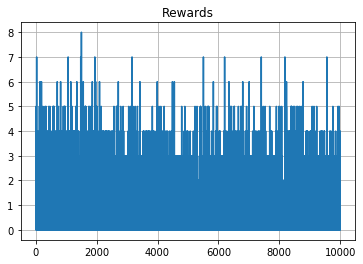

In [11]:
# 10_000 epochs
train( 
    predictor = dqn_predictor,
    end_eps_frame = 1_000_000,
    eps_beg = 1.0,
    eps_end = 0.1,
    epochs = 1_000,
    stages = 10,
    training_number = 1
)